## Multi-threading

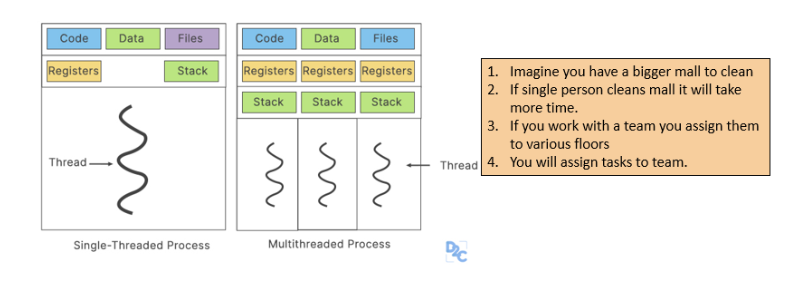

#### Single threaded processe
by default coding in python is single threaded

In [5]:
import time

In [6]:
%%time
time.sleep(2.5)
print("Hello")

Hello
CPU times: total: 15.6 ms
Wall time: 2.58 s


In [10]:
def hypotenuse(a,b):
    print("Hypotenuse code execution started")
    time.sleep(2)
    h = (a**2 + b**2)**(1/2)
    print(f"Hypotenuse of sides {a} and {b} is {h:.4f}")
    print("Hypotenuse code completed")

In [11]:
%%time
hypotenuse(3,4)

Hypotenuse code execution started
Hypotenuse of sides 3 and 4 is 5.0000
Hypotenuse code completed
CPU times: total: 0 ns
Wall time: 2 s


In [8]:
def simple_intrest(p,n,r):
    print("Simple intrest code execution started")
    time.sleep(3)
    i = (p*n*r)/100
    a = p + i
    print(f"Principle :{p} INR, Number of years : {n},Rate of Intrest :{r} %p.a.")
    print(f"Intrest : {i:.2f}INR")
    print(f"Amount : {a:.2f}INR")
    print(f"Simple Intrest Code Excecution done")

In [9]:
%%time
simple_intrest(p=50000,n=4,r=6.5)

Simple intrest code execution started
Principle :50000 INR, Number of years : 4,Rate of Intrest :6.5 %p.a.
Intrest : 13000.00INR
Amount : 63000.00INR
Simple Intrest Code Excecution done
CPU times: total: 0 ns
Wall time: 3 s


In [12]:
%%time
hypotenuse(4,5) # 2 sec
simple_intrest(p=65000,n=9,r=7.3) # 3 sec

Hypotenuse code execution started
Hypotenuse of sides 4 and 5 is 6.4031
Hypotenuse code completed
Simple intrest code execution started
Principle :65000 INR, Number of years : 9,Rate of Intrest :7.3 %p.a.
Intrest : 42705.00INR
Amount : 107705.00INR
Simple Intrest Code Excecution done
CPU times: total: 0 ns
Wall time: 5.01 s


#### Execute above functions simulatneously using multithreading

In [13]:
from threading import Thread

In [14]:
%%time
# Create the threads
th1 = Thread(target=hypotenuse,args=(12,13))
th2 = Thread(target=simple_intrest,args=(73000,6.5,7.2))

# Start all the threads
th1.start()
th2.start()

# wait for all threads to finish
th1.join()
th2.join()

Hypotenuse code execution startedSimple intrest code execution started

Hypotenuse of sides 12 and 13 is 17.6918
Hypotenuse code completed
Principle :73000 INR, Number of years : 6.5,Rate of Intrest :7.2 %p.a.
Intrest : 34164.00INR
Amount : 107164.00INR
Simple Intrest Code Excecution done
CPU times: total: 31.2 ms
Wall time: 3.01 s


### For multiple tast to execute simulatneously multithreading is faster

### Single functioon but calculating multiple values

In [15]:
def square(n):
    time.sleep(3)
    s = n**2
    print(f"Square of number {n} is {s}\n\n")

In [16]:
%%time
square(4)

Square of number 4 is 16


CPU times: total: 0 ns
Wall time: 3 s


In [17]:
nums = [1,2,3,4,5,6,7]
nums

[1, 2, 3, 4, 5, 6, 7]

In [19]:
%%time
for i in nums:
    square(i)

Square of number 1 is 1


Square of number 2 is 4


Square of number 3 is 9


Square of number 4 is 16


Square of number 5 is 25


Square of number 6 is 36


Square of number 7 is 49


CPU times: total: 31.2 ms
Wall time: 21 s


In [20]:
def multithread_squares(nums: list[int | float]):
    # Create the list of threads
    threads = []

    # Start all the threads
    for i in nums:
        th = Thread(target=square, args=(i,))
        th.start()
        threads.append(th)
    
    # wait for all threads to finish
    for th in threads:
        th.join()

In [21]:
nums

[1, 2, 3, 4, 5, 6, 7]

In [22]:
%%time
multithread_squares(nums)

Square of number 1 is 1


Square of number 3 is 9


Square of number 4 is 16


Square of number 2 is 4


Square of number 6 is 36


Square of number 5 is 25


Square of number 7 is 49


CPU times: total: 0 ns
Wall time: 3.01 s


In [23]:
n = list(range(51,71,1))
n

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

In [24]:
len(n)

20

In [25]:
%%time
multithread_squares(n)

Square of number 51 is 2601

Square of number 53 is 2809


Square of number 52 is 2704


Square of number 55 is 3025


Square of number 54 is 2916


Square of number 58 is 3364


Square of number 57 is 3249


Square of number 56 is 3136


Square of number 61 is 3721


Square of number 60 is 3600


Square of number 59 is 3481


Square of number 64 is 4096


Square of number 63 is 3969


Square of number 62 is 3844


Square of number 66 is 4356


Square of number 67 is 4489


Square of number 65 is 4225


Square of number 70 is 4900


Square of number 69 is 4761


Square of number 68 is 4624



CPU times: total: 15.6 ms
Wall time: 3.01 s


## Practical example of multithreading - Downloading multiple files


1. https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv
2. https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv
3. https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv

In [53]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv"
]

In [56]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [57]:
urls[0].split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'main',
 'artifacts',
 'data.csv']

In [58]:
urls[0].split("/")[-1]

'data.csv'

In [59]:
from urllib.request import urlretrieve

In [60]:
def download_file(url: str):
    file_name = url.split("/")[-1]
    print(f"{file_name} download started ...")
    urlretrieve(url,file_name)
    print(f"{file_name} download complete")
    print("\n=======================================\n")

In [61]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [62]:
%%time
for i in urls:
    download_file(i)

data.csv download started ...
data.csv download complete


test.csv download started ...
test.csv download complete


train.csv download started ...
train.csv download complete


CPU times: total: 312 ms
Wall time: 15.4 s


In [63]:
def multithread_download(urls:list[str]):
    # Create threads for each url
    threads = []

    # Create and start all threads
    for i in urls:
        th = Thread(target= download_file, args=(i,))
        th.start()
        threads.append(th)

        # wait for all threads to finish
        for th in threads:
            th.join()

In [64]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv']

In [65]:
%%time
multithread_download(urls)

data.csv download started ...
data.csv download complete


test.csv download started ...
test.csv download complete


train.csv download started ...
train.csv download complete


CPU times: total: 344 ms
Wall time: 9.69 s
